# Retail-Transactions Cleaning

In [1]:
import pandas as pd
import ast

In [2]:
retail_df = pd.read_csv('../../data/retail-transactions/Retail_Transactions_Dataset.csv')

In [3]:
retail_df.head()


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [4]:
order_products_train_df = pd.read_csv('../../data/instacart-market-basket-analysis/order_products_train.csv')
order_products_prior_df = pd.read_csv('../../data/instacart-market-basket-analysis/order_products_prior.csv')
products_df = pd.read_csv('../../data/instacart-market-basket-analysis/products.csv')

Data Cleaning

In [5]:
# Remove duplicates
retail_df = retail_df.drop_duplicates()
order_products_train_df = order_products_train_df.drop_duplicates()
order_products_prior_df = order_products_prior_df.drop_duplicates()
products_df = products_df.drop_duplicates()

#Remove missing values
retail_df = retail_df.dropna()
order_products_train_df = order_products_train_df.dropna()
order_products_prior_df = order_products_prior_df.dropna()
products_df = products_df.dropna()

In [6]:
print(len(retail_df))
print(len(order_products_train_df))
print(len(order_products_prior_df))
print(len(products_df))

666057
1384617
32434489
49688


Data Integration (Instacart)

In [7]:
# Join order_products_train with products

# instacart_df = pd.merge(order_products_train_df, products_df, on='product_id', how='inner')

instacart_df = pd.concat([order_products_train_df, order_products_prior_df])
instacart_df = pd.merge(instacart_df, products_df, on='product_id', how='inner')

In [8]:
instacart_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
...,...,...,...,...,...,...,...
33819101,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17
33819102,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19
33819103,3421083,4600,8,0,All Natural French Toast Sticks,52,1
33819104,3421083,24852,9,1,Banana,24,4


Feature Selection

In [9]:
# Rename attributes biar sama
retail_df = retail_df.rename(columns={'Transaction_ID': 'order_id', 'Product': 'product_name'})

retail_df = retail_df[['order_id', 'product_name']]  # Only keep order_id and product_name from df2
instacart_df = instacart_df[['order_id', 'product_name']]  # Only keep order_id and product_name from df2

Data Transformation

In [10]:
retail_df['product_name'] = retail_df['product_name'].apply(ast.literal_eval)
retail_df = retail_df.explode('product_name', ignore_index=True)

In [11]:
retail_df

,order_id,product_name
0,1000000001,Ice Cream
1,1000000001,Milk
2,1000000001,Olive Oil
3,1000000001,Bread
4,1000000001,Potatoes
...,...,...
1999285,1000999998,Coffee
1999286,1000999998,Mop
1999287,1000999999,Trash Cans
1999288,1000999999,Mop


In [12]:
# retail_df.to_csv("../../data/transformed/retail_transformed.csv", index=False)

Sample 1.5% dari keseluruhan dataset

In [13]:
sampling = 0.015
rand_seed = 42

In [14]:
instacart_sample = instacart_df.sample(frac=sampling, random_state=rand_seed)

In [15]:
instacart_sample

,order_id,product_name
7009614,593759,Medium Cheddar Cheese Block
12886293,1214222,Organic Red Bell Pepper
30444410,3064778,Thin And Crispy Corn Tortilla Chips
27795025,2785011,Organic Unsweetened Plain Soymilk
10883987,1002723,8 1/2 Inch Plates - 95 CT
...,...,...
21711331,2143932,Organic Low Sodium Chicken Broth
26884187,2689414,Canned Aranciata Orange
10038741,913588,Organic Red Chard Greens
18166013,1770082,Coconut Almond Chocolate


In [16]:
retail_sample = retail_df.sample(frac=sampling, random_state=rand_seed)

In [17]:
retail_sample

,order_id,product_name
110929,1000055337,Ice Cream
95493,1000047698,Dishware
947863,1000473834,Mayonnaise
555620,1000277807,Banana
470302,1000235021,Light Bulbs
...,...,...
1885205,1000943161,Tea
1663460,1000832357,Trash Bags
230641,1000115374,Bread
1822877,1000912084,Water


Data Integration (Retail and Instacart)

In [18]:
combined_df = pd.concat([retail_sample, instacart_sample], ignore_index=True)
combined_df

,order_id,product_name
0,1000055337,Ice Cream
1,1000047698,Dishware
2,1000473834,Mayonnaise
3,1000277807,Banana
4,1000235021,Light Bulbs
...,...,...
537271,2143932,Organic Low Sodium Chicken Broth
537272,2689414,Canned Aranciata Orange
537273,913588,Organic Red Chard Greens
537274,1770082,Coconut Almond Chocolate


### mlxtend

In [19]:
# %pip install mlxtend

In [20]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, apriori, hmine, association_rules

In [21]:
transactions = combined_df.groupby('order_id')['product_name'].apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,#2 Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,...,with Crispy Almonds Cereal,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Pineapple Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
min_supp = 0.00001
# min_freq = 500
# min_supp = min_freq / len(df_encoded)
min_thresh = 1.1
metric = "lift"
print(len(df_encoded))

485641


#### Apriori

In [47]:
frequent_itemsets_apriori = apriori(df_encoded, min_support=min_supp, use_colnames=True, low_memory=True)
# frequent_itemsets_apriori = apriori(df_encoded, min_support=min_supp, use_colnames=True)

In [48]:
# print("Frequent Itemsets:")
# print(frequent_itemsets_apriori)
frequent_itemsets_apriori

,support,itemsets
0,0.000027,(#2 Coffee Filters)
1,0.000010,(0 Calorie Strawberry Dragonfruit Water Beverage)
2,0.000012,(0% Fat Blueberry Greek Yogurt)
3,0.000136,(0% Fat Free Organic Milk)
4,0.000051,(0% Fat Organic Greek Vanilla Yogurt)
...,...,...
12097,0.000010,"(Organic Kiwi, Organic Whole Milk)"
12098,0.000023,"(Organic Raspberries, Organic Strawberries)"
12099,0.000010,"(Organic Whole Milk, Organic Strawberries)"
12100,0.000012,"(Organic Yellow Onion, Organic Strawberries)"


In [49]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric=metric, min_threshold=min_thresh, num_itemsets=len(frequent_itemsets_apriori))
# print("Association Rules:")
rules_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Organic Cucumber),(Asparagus),0.002638,0.002185,0.000010,0.003903,1.786573,1.0,0.000005,1.001725,0.441434,0.002139,0.001722,0.004308
1,(Asparagus),(Organic Cucumber),0.002185,0.002638,0.000010,0.004713,1.786573,1.0,0.000005,1.002085,0.441233,0.002139,0.002080,0.004308
2,(Limes),(Bunched Cilantro),0.004516,0.001435,0.000010,0.002280,1.588598,1.0,0.000004,1.000847,0.372195,0.001733,0.000846,0.004727
3,(Bunched Cilantro),(Limes),0.001435,0.004516,0.000010,0.007174,1.588598,1.0,0.000004,1.002677,0.371047,0.001733,0.002670,0.004727
4,(Cucumber Kirby),(Organic Cilantro),0.003000,0.002366,0.000010,0.003432,1.450460,1.0,0.000003,1.001069,0.311498,0.001922,0.001068,0.003892
5,(Organic Cilantro),(Cucumber Kirby),0.002366,0.003000,0.000010,0.004352,1.450460,1.0,0.000003,1.001357,0.311300,0.001922,0.001356,0.003892
6,(Lime Sparkling Water),(Sparkling Water Grapefruit),0.001423,0.002450,0.000014,0.010130,4.134170,1.0,0.000011,1.007758,0.759194,0.003735,0.007699,0.008006
7,(Sparkling Water Grapefruit),(Lime Sparkling Water),0.002450,0.001423,0.000014,0.005882,4.134170,1.0,0.000011,1.004486,0.759976,0.003735,0.004466,0.008006
8,(Organic Gala Apples),(Organic Lemon),0.002337,0.002802,0.000010,0.004405,1.571923,1.0,0.000004,1.001610,0.364689,0.002007,0.001607,0.004040
9,(Organic Lemon),(Organic Gala Apples),0.002802,0.002337,0.000010,0.003674,1.571923,1.0,0.000004,1.001342,0.364859,0.002007,0.001340,0.004040


#### FP-Growth

In [50]:
frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=min_supp, use_colnames=True)
# print("Frequent Itemsets:")
# print(frequent_itemsets_fpgrowth)
frequent_itemsets_fpgrowth

MemoryError: Unable to allocate 13.3 GiB for an array with shape (29353, 485641) and data type bool

In [56]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric=metric, min_threshold=min_thresh, num_itemsets=len(frequent_itemsets_fpgrowth))
# print("Association Rules:")
# print(rules_fpgrowth)
rules_fpgrowth

NameError: name 'frequent_itemsets_fpgrowth' is not defined

#### H-Mine

In [51]:
frequent_itemsets_hmine = hmine(df_encoded, min_support=min_supp, use_colnames=True)
# print("Frequent Itemsets:")
frequent_itemsets_hmine

,support,itemsets
0,0.000027,(#2 Coffee Filters)
1,0.00001,(0 Calorie Strawberry Dragonfruit Water Beverage)
2,0.000012,(0% Fat Blueberry Greek Yogurt)
3,0.000136,(0% Fat Free Organic Milk)
4,0.000051,(0% Fat Organic Greek Vanilla Yogurt)
...,...,...
12097,0.000115,(of Hanover 100 Calorie Pretzels Mini)
12098,0.000128,(smartwater® Electrolyte Enhanced Water)
12099,0.000054,(vitaminwater® XXX Acai Blueberry Pomegranate)
12100,0.000152,(with Crispy Almonds Cereal)


In [52]:
rules_hmine = association_rules(frequent_itemsets_hmine, metric=metric, min_threshold=min_thresh, num_itemsets=len(frequent_itemsets_hmine))
# print("Association Rules:")
# print(rules_hmine)
rules_hmine

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Organic Cucumber),(Asparagus),0.002638,0.002185,0.000010,0.003903,1.786573,1.0,0.000005,1.001725,0.441434,0.002139,0.001722,0.004308
1,(Asparagus),(Organic Cucumber),0.002185,0.002638,0.000010,0.004713,1.786573,1.0,0.000005,1.002085,0.441233,0.002139,0.002080,0.004308
2,(Limes),(Bunched Cilantro),0.004516,0.001435,0.000010,0.002280,1.588598,1.0,0.000004,1.000847,0.372195,0.001733,0.000846,0.004727
3,(Bunched Cilantro),(Limes),0.001435,0.004516,0.000010,0.007174,1.588598,1.0,0.000004,1.002677,0.371047,0.001733,0.002670,0.004727
4,(Cucumber Kirby),(Organic Cilantro),0.003000,0.002366,0.000010,0.003432,1.450460,1.0,0.000003,1.001069,0.311498,0.001922,0.001068,0.003892
5,(Organic Cilantro),(Cucumber Kirby),0.002366,0.003000,0.000010,0.004352,1.450460,1.0,0.000003,1.001357,0.311300,0.001922,0.001356,0.003892
6,(Lime Sparkling Water),(Sparkling Water Grapefruit),0.001423,0.002450,0.000014,0.010130,4.134170,1.0,0.000011,1.007758,0.759194,0.003735,0.007699,0.008006
7,(Sparkling Water Grapefruit),(Lime Sparkling Water),0.002450,0.001423,0.000014,0.005882,4.134170,1.0,0.000011,1.004486,0.759976,0.003735,0.004466,0.008006
8,(Organic Gala Apples),(Organic Lemon),0.002337,0.002802,0.000010,0.004405,1.571923,1.0,0.000004,1.001610,0.364689,0.002007,0.001607,0.004040
9,(Organic Lemon),(Organic Gala Apples),0.002802,0.002337,0.000010,0.003674,1.571923,1.0,0.000004,1.001342,0.364859,0.002007,0.001340,0.004040


# References

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
popular = combined_df['product_name'].value_counts()
popular.head(20)

product_name
Banana                      7455
Bag of Organic Bananas      5937
Organic Strawberries        4161
Organic Baby Spinach        3687
Organic Hass Avocado        3259
Organic Avocado             2777
Large Lemon                 2401
Strawberries                2195
Limes                       2193
Organic Raspberries         2166
Organic Whole Milk          2150
Organic Yellow Onion        1789
Organic Garlic              1738
Organic Zucchini            1634
Organic Blueberries         1632
Carrots                     1522
Cucumber Kirby              1457
Organic Fuji Apple          1441
Organic Lemon               1361
Apple Honeycrisp Organic    1326
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_7112\2283553626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')


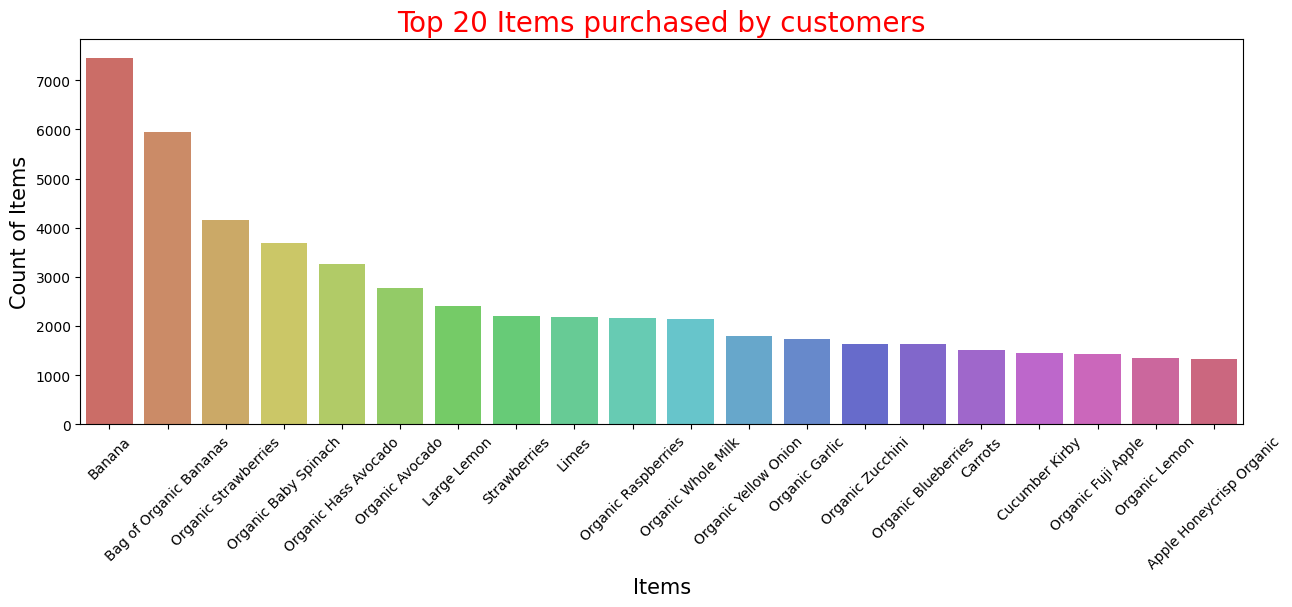

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(x = popular.head(20).index, y = popular.head(20).values, palette = 'hls')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'red', size = 20)
plt.show()